In [1]:
import torch
from sklearn.datasets import make_regression
import pandas as pd
from torch.autograd import Variable

C:\Users\Onsiter\.conda\envs\nlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [125]:
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

In [3]:
df_data

,x1,x2,x3,x4,y
0,1.764052,0.400157,0.978738,2.240893,49.822907
1,1.867558,-0.977278,0.950088,-0.151357,4.877286
2,-0.103219,0.410599,0.144044,1.454274,11.914875
3,0.761038,0.121675,0.443863,0.333674,19.753078
4,1.494079,-0.205158,0.313068,-0.854096,23.607000
...,...,...,...,...,...
95,-1.698106,0.387280,-2.255564,-1.022507,-21.564910
96,0.038631,-1.656715,-0.985511,-1.471835,-55.818011
97,1.648135,0.164228,0.567290,-0.222675,39.385820
98,-0.353432,-1.616474,-0.291837,-0.761492,-62.477272


# I. Basic Concept

## 1. Dataset Class

Thông thường Dataset sẽ được kế thừa từ class Dataset.

Tuy nhiên không nhất thiết phải kế thừa, chỉ cần tạo class theo kiến trúc như bên dưới

In [4]:
class CustomDataset:
    def __init__(self, data, target):
        self.data = data
        self.target = target
    
    def __len__(self):
        """
        Return length of data
        """
        return len(self.data)
    
    def __getitem__(self, idx):
        """
        Return sample at idx as dictionary and data type is tensor
        """
        current_sample = self.data[idx, :]
        current_target = self.target[idx]
        return {
            "sample": torch.tensor(current_sample, dtype=torch.float),
            "target": torch.tensor(current_target, dtype=torch.long)
        }

In [5]:
dataset = CustomDataset(X, y)

Từng sample riêng lẻ được lấy ra như 1 list thông thường.

In [6]:
dataset[0]

{'sample': tensor([1.7641, 0.4002, 0.9787, 2.2409]), 'target': tensor(49)}

In [7]:
dataset[0]['sample']

tensor([1.7641, 0.4002, 0.9787, 2.2409])

In [8]:
dataset.__len__()

100

## 2. Dataloader

Trước khi tới ứng dụng Dataloader, cần tìm hiểu về khái niệm Epoch và Batchsize.

**Batch Size**
- Khi đưa toàn bộ data trong một lần feed foward vào model, thường việc tính toán sẽ rất chậm, có thể là bất khả thi. 
- Vì vậy ta đưa 1 lượng data (^2, 8-16-32-64 rows) cho 1 lần thực hiện feed foward. Mặc dù điều này có thể gây vấn đề optimize local (not optimize global). 

Để dễ dàng chia data set thành nhiều batch size một cách ngầu nhiên, ta có thể sử dụng Dataloader.
- Tạo dataset với format của pytorch. Dễ dàng tạo ra nhiều batch khác nhau.

In [9]:
from torch.utils.data import DataLoader

In [10]:
data_loader = DataLoader(dataset, batch_size=8, shuffle=False)

Với batch size = 8. Tức data chia thành nhiều batch, trong đó 1 batch sẽ chưa 8 rows data


In [12]:
for data in data_loader:
    print(data)
    break

{'sample': tensor([[ 1.7641,  0.4002,  0.9787,  2.2409],
        [ 1.8676, -0.9773,  0.9501, -0.1514],
        [-0.1032,  0.4106,  0.1440,  1.4543],
        [ 0.7610,  0.1217,  0.4439,  0.3337],
        [ 1.4941, -0.2052,  0.3131, -0.8541],
        [-2.5530,  0.6536,  0.8644, -0.7422],
        [ 2.2698, -1.4544,  0.0458, -0.1872],
        [ 1.5328,  1.4694,  0.1549,  0.3782]]), 'target': tensor([ 49,   4,  11,  19,  23, -29,  -3,  81])}


## 3. Gradient and Backward

Trước khi build model Linear Regression đơn giản với Pytorch, ta cần làm rõ vấn đề sau :
- Cách thức Pytoch tính đạo hàm (Gradient)
- Khái niệm về backward
- Tính toán Loss function
- Optimization với loss function, trong đó sử dụng Gradient. 


https://www.tutorialspoint.com/what-does-backward-do-in-pytorch

https://medium.com/@monadsblog/pytorch-backward-function-e5e2b7e60140

https://abishekbashyall.medium.com/playing-with-backward-method-in-pytorch-bd34b58745a0

- Có thể tính toán đạo hàm tại một node bằng cách set `requires_grad = True.`




### 3.1 Basic Gradient and Backward

Cho function, F = a*b
Với 
- a = 10 
- b = 10

> Đạo hàm riêng của a : ∂F/∂a = b => ∂F/∂a = 20

> Đạo hàm riêng của b : ∂F/∂b = a => ∂F/∂b = 10

**Note**
- Đạo hàm chỉ được tính sau khi backward được gọi.
- Backward là quá trình tính toán đạo hàm từ tensor thực hiện lệnh backward cho tới toàn bộ tensor tại lớp lá (Graph leaves)

In [23]:
a = torch.tensor([10.], requires_grad=True)
b = torch.tensor([20.], requires_grad=True)

x = torch.tensor([20.])

f = torch.matmul(a,  b) + x

In [24]:
f.backward()

In [25]:
print("Gradient of a : ", a.grad, "Gradient b : ", b.grad)

Gradient of a :  tensor([20.]) Gradient b :  tensor([10.])


### 3.2 Loss



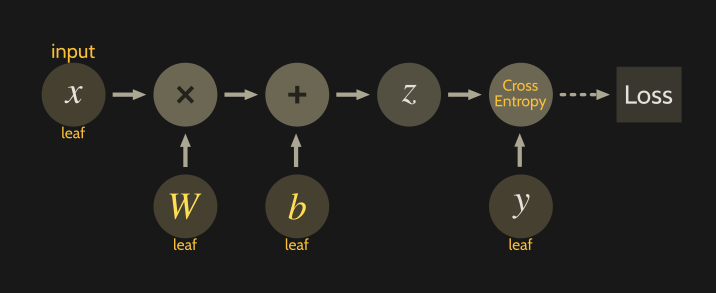

**Backward()** Computes the gradient of current tensor w.r.t. graph leaves.


- Gradient chỉ được tính sau khi function `backward()` được gọi
- Chỉ những left node mới có thể tính được gradient. Ví dụ tại `W, b hoặc X`

**NOTE**:

> Không thể run backward cho z. Nếu z là dim 1,1 thì còn tính được, nhưng nếu dim > 1 thì báo lỗi. Nguyên nhân cần tìm hiểu thêm. 

In [32]:
x = torch.randn(10, 8)  # input tensor. Giả sử ta có 10 samples, mỗi sample gồm 8 feature
y = torch.zeros(10)    # Target tương ứng với giá trị y thực tế ứng với 10 samples trên.

W = torch.randn(8, requires_grad=True) # weights tương ứng với 8 features trên
b = torch.randn(1, requires_grad=True) # bias vector

z = torch.matmul(x, W) + b # output của model.

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)  # Loss values

In [33]:
loss.backward()

In [34]:
print("Gradient of weight is ", W.grad, ". Gradient of b is ", b) 

Gradient of weight is  tensor([ 0.0570,  0.0378, -0.2207, -0.0791, -0.0656, -0.1663, -0.2806,  0.1156]) . Gradient of b is  tensor([-1.4276], requires_grad=True)


## 4. Simple Linear Regression Model

### 4.1 Generate data

- Features : Gồm 4 biến x1 ~ x4. dạng float
- Target : Numeric. 

In [47]:
features = ['x1', 'x2', 'x3', 'x4']
labels = 'y'
df_data = pd.DataFrame(X, columns=features)
df_data[labels] = y

In [188]:
df_data

,x1,x2,x3,x4,y
0,1.764052,0.400157,0.978738,2.240893,49.822907
1,1.867558,-0.977278,0.950088,-0.151357,4.877286
2,-0.103219,0.410599,0.144044,1.454274,11.914875
3,0.761038,0.121675,0.443863,0.333674,19.753078
4,1.494079,-0.205158,0.313068,-0.854096,23.607000
...,...,...,...,...,...
95,-1.698106,0.387280,-2.255564,-1.022507,-21.564910
96,0.038631,-1.656715,-0.985511,-1.471835,-55.818011
97,1.648135,0.164228,0.567290,-0.222675,39.385820
98,-0.353432,-1.616474,-0.291837,-0.761492,-62.477272


**DataSet**

Data sử dụng trong pytorch cần được chuyển về dạng Objects. Tối thiểu gồm 2 function căn bản :
- `__len__` : Độ dài của dataset
- `__getitem__` : Return về 1 sample data đã được convert qua dạng tensor

In [189]:
class CustomDataset:
    def __init__(self, data, target):
        self.data = data
        self.target = target
    
    def __len__(self):
        """
        Return length of data
        """
        return len(self.data)
    
    def __getitem__(self, idx):
        """
        Return sample at idx as dictionary and data type is tensor
        """
        current_sample = self.data[idx, :]
        current_target = self.target[idx]
        return {
            "sample": torch.tensor(current_sample, dtype=torch.float),
            "target": torch.tensor(current_target, dtype=torch.float)
        }
    
    def to_pandas(self, features, target):
        """
        Not required, this function used to visualize predict values
        """
        df = pd.DataFrame(self.data, columns=features)
        df[target] = self.target
        
        return df

In [127]:
dataset = CustomDataset(data=X, target=y)

In [129]:
dataloader = DataLoader(dataset, batch_size=8)

### 4.2 Build model

- Loss Function sử dụng là MSE. https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss

In [191]:
# Define model 

model = lambda x, w, b: torch.matmul(x, w) + b

In [193]:
# Init weight and b
w = torch.randn(4, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

learning_rate = 0.001
eporchs = 100

for epoch in range(eporchs):
        
    epoch_loss = 0
    for batch in dataloader:
        _x = batch["sample"]
        _y = batch["target"].reshape(-1,1)
        
        output = model(_x, w, b)
        
        loss = torch.nn.MSELoss()(output, _y)
        
        loss.backward()
        
        # Optimizer
        with torch.no_grad():
            w = w - learning_rate * w.grad
            b = b - learning_rate * b.grad
            
        w.requires_grad_(True)
        b.requires_grad_(True)
        
        epoch_loss += loss.item()
        
    if epoch % 10 == 0:
        print("Epoch : ",epoch, " Loss : ",epoch_loss)

Epoch :  0  Loss :  20441.014770507812
Epoch :  10  Loss :  11744.809295654297
Epoch :  20  Loss :  6913.106582641602
Epoch :  30  Loss :  4175.6396484375
Epoch :  40  Loss :  2589.5048599243164
Epoch :  50  Loss :  1647.4812316894531
Epoch :  60  Loss :  1073.266757965088
Epoch :  70  Loss :  714.0120697021484
Epoch :  80  Loss :  483.58666801452637
Epoch :  90  Loss :  332.403281211853


In [194]:
print("Weight of w after learning ", w, ". Bias = ", b)

Weight of w after learning  tensor([[18.5350],
        [30.4026],
        [ 2.9158],
        [ 0.9457]], requires_grad=True) . Bias =  tensor([-0.2636], requires_grad=True)


### 4.3 Visualize predict

**X : Must be a tensor. We used customDataset to make each sample become a tensor**

In [195]:
predict_dataset = CustomDataset(df_data[["x1", "x2", "x3", "x4"]].values, df_data["y"].values)

In [196]:
y_predict = []

for sample in predict_dataset:
    _x = sample["sample"]
    _y_predict = model(_x, w, b)
    
    y_predict.append(_y_predict.tolist()[0])

In [197]:
df_predict = predict_dataset.to_pandas(features=["x1",  "x2", "x3", "x4"], target="y")

In [198]:
df_predict["predict"] = y_predict

<AxesSubplot:>

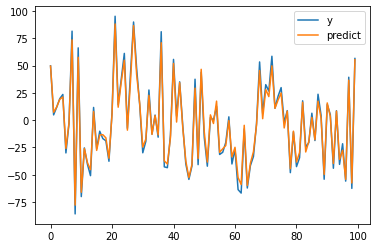

In [199]:
df_predict[["y", "predict"]].plot()

# II. Hardware

In [27]:
import torch

## 1. Driver check

**Kiểm tra GPU Nvdia driver đã được cài đặt chưa**

In [26]:
print(torch.cuda.is_available())

True


**Toàn bộ tensor đều được khởi tạo mặc định trên CPU.**

> [variable].is_cuda `# Check 1 variable có được mặc định tính toán trên GPU không`

In [20]:
x1 = torch.tensor([0.1, 0.2, 0.3])
print(x1.is_cuda)

False


Cách check model chạy trên CPU or GPU.

In [24]:
model = torch.nn.Linear(5, 1)
print(next(model.parameters()).is_cuda)

False


## 2. Convert CPU to GPU

In [29]:
# Define divice name. Nếu GPU có thể sử dụng, device sẽ có tên cuda:0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [34]:
x1 = x1.to(device)
print("Is variable run on GPU : ", x1.is_cuda)

model = model.to(device)
print("Is model run on GPU :", next(model.parameters()).is_cuda)

Is variable run on GPU :  True
Is model run on GPU : True


*Tensor cuda package có hỗ trợ function convert qua gpu*

In [39]:
x2 = torch.tensor([0.1, 0.2])
x2 = x2.cuda()
print("Is x2 run on GPU : ", x2.is_cuda)

Is x2 run on GPU :  True


In [48]:
print("Number of device : ", torch.cuda.device_count())

print("Current using index of device : ", torch.cuda.current_device())

print("Device name is : ", torch.cuda.get_device_name(0))

print("Device memory is : ", torch.cuda.memory_cached())

print("Memory using is : ", torch.cuda.memory_allocated())

Number of device :  1
Current using index of device :  0
Device name is :  NVIDIA GeForce RTX 3070 Laptop GPU
Device memory is :  2097152
Memory using is :  3072


C:\Users\Onsiter\.conda\envs\nlp\lib\site-packages\torch\cuda\memory.py:386: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  FutureWarning)


Clear GPU cache

In [49]:
torch.cuda.empty_cache()